<a href="https://colab.research.google.com/github/aaronszypulagastro/FirstCarModel/blob/main/First_Car_Modell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf  # Modelle mit TensorFlow erstellen
import pandas as pd      # Daten einlesen und bearbeiten
import seaborn as sns    # Daten visualisieren
import matplotlib.pyplot as plt  # Plots erstellen

from tensorflow.keras.layers import Normalization, Dense, InputLayer  # Layer hinzufügen
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, Huber  # Fehlerfunktionen
from tensorflow.keras.optimizers import Adam  # Optimierungsalgorithmus
from tensorflow.keras.metrics import RootMeanSquaredError  # Metriken zur Modellbewertung


In [17]:
data = pd.read_csv("train.csv")
data.head()


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [18]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(data)


In [19]:
x_train = data.iloc[:int(TRAIN_RATIO * DATASET_SIZE), 3:-1] # Select relevant columns for training features
y_train = data.iloc[:int(TRAIN_RATIO * DATASET_SIZE), -1] # Select target column for training labels
print(x_train.shape) # anzahl der traindata

(800, 8)


In [20]:
x_val = data.iloc[int(TRAIN_RATIO * DATASET_SIZE):int((TRAIN_RATIO + VAL_RATIO) * DATASET_SIZE), 3:-1] # Select relevant columns for validation features
y_val = data.iloc[int(TRAIN_RATIO * DATASET_SIZE):int((TRAIN_RATIO + VAL_RATIO) * DATASET_SIZE), -1] # Select target column for validation labels
print(x_val.shape) # anzahl der valdata

(100, 8)


In [21]:
x_test = data.iloc[int((TRAIN_RATIO + VAL_RATIO) * DATASET_SIZE):, 3:-1] # Select relevant columns for test features
y_test = data.iloc[int((TRAIN_RATIO + VAL_RATIO) * DATASET_SIZE):, -1] # Select target column for test labels
print(x_test.shape)

(100, 8)


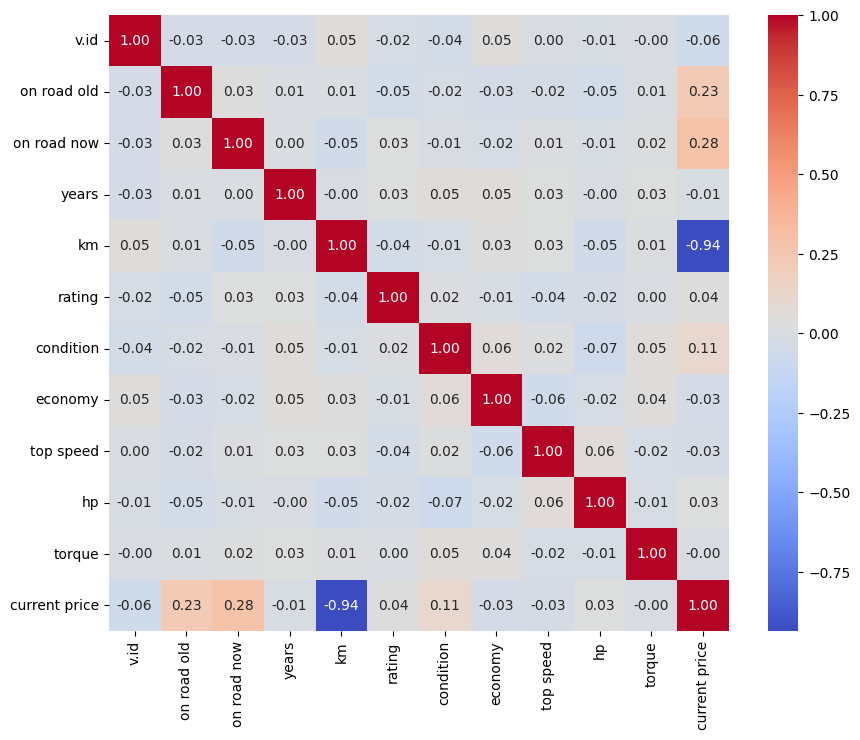

In [22]:
# Pairplot für wichtige Variablen
#sns.pairplot(data[["years", "km", "rating", "condition", "economy",
                   #"top speed", "hp", "torque", "current price"]], diag_kind="kde")
# Z. B. km negativ → mehr Kilometer = niedriger Preis.

#Z. B. hp und top speed positiv → stärkere Autos = höherer Preis.

corr = data.corr() # Korrelationsmatrix

# Heatmap anzeigen
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [23]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [24]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:-5])

tf.Tensor(
[[7.180000e+02 6.943630e+05 7.516590e+05 ... 8.400000e+01 9.900000e+01
  2.737070e+05]
 [4.740000e+02 6.474220e+05 7.507740e+05 ... 1.000000e+02 1.080000e+02
  1.789915e+05]
 [5.050000e+02 6.944910e+05 7.928320e+05 ... 8.900000e+01 1.010000e+02
  1.694710e+05]
 ...
 [6.940000e+02 5.137330e+05 8.061980e+05 ... 1.190000e+02 8.700000e+01
  6.546750e+04]
 [2.980000e+02 5.043200e+05 7.065800e+05 ... 7.100000e+01 1.380000e+02
  2.174460e+05]
 [1.180000e+02 6.344610e+05 7.109010e+05 ... 5.100000e+01 1.190000e+02
  2.394000e+05]], shape=(995, 12), dtype=float32)


In [25]:
x = tensor_data[:, 3:-1] #wählt alle wichtigen spalten aus
print(x[:5])

tf.Tensor(
[[6.00000e+00 1.11844e+05 5.00000e+00 3.00000e+00 1.50000e+01 1.44000e+02
  8.40000e+01 9.90000e+01]
 [2.00000e+00 1.32215e+05 3.00000e+00 7.00000e+00 1.20000e+01 1.37000e+02
  1.00000e+02 1.08000e+02]
 [4.00000e+00 1.43994e+05 5.00000e+00 4.00000e+00 1.10000e+01 1.35000e+02
  8.90000e+01 1.01000e+02]
 [7.00000e+00 9.89310e+04 4.00000e+00 8.00000e+00 1.20000e+01 1.62000e+02
  1.04000e+02 7.40000e+01]
 [7.00000e+00 8.64680e+04 4.00000e+00 9.00000e+00 1.10000e+01 1.93000e+02
  5.40000e+01 9.90000e+01]], shape=(5, 8), dtype=float32)


In [26]:
y = tensor_data[:,-1] #wählt alle wichtigen spalten aus (in dem fall die letzte)
y = tf.expand_dims(y, axis = -1) #machen wir damit x und y den gleichen shape haben
print(y[:5])


tf.Tensor(
[[273707. ]
 [178991.5]
 [169471. ]
 [351704.5]
 [456554.5]], shape=(5, 1), dtype=float32)


In [27]:
from os.path import normcase
normalizer = Normalization()
normalizer.adapt(tf.constant(x_train, dtype=tf.float32))
normalizer(tf.constant(x, dtype=tf.float32))[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.83045536,  0.4309577 ,  1.3976448 , -0.9313433 ,  1.5380425 ,
        -1.1945924 , -0.03575838, -0.19874007],
       [-1.492497  ,  1.1300359 , -0.00350295,  0.48717114,  0.19867301,
        -1.5568448 ,  0.749329  ,  0.22612001],
       [-0.33102083,  1.5342596 ,  1.3976448 , -0.5767147 , -0.2477835 ,
        -1.6603456 ,  0.20958142, -0.10432671],
       [ 1.4111935 , -0.01218184,  0.6970709 ,  0.84179974,  0.19867301,
        -0.2630861 ,  0.9456008 , -1.378907  ],
       [ 1.4111935 , -0.4398786 ,  0.6970709 ,  1.1964284 , -0.2477835 ,
         1.3411747 , -1.5077971 , -0.19874007]], dtype=float32)>

In [28]:
print(x[:5])

tf.Tensor(
[[6.00000e+00 1.11844e+05 5.00000e+00 3.00000e+00 1.50000e+01 1.44000e+02
  8.40000e+01 9.90000e+01]
 [2.00000e+00 1.32215e+05 3.00000e+00 7.00000e+00 1.20000e+01 1.37000e+02
  1.00000e+02 1.08000e+02]
 [4.00000e+00 1.43994e+05 5.00000e+00 4.00000e+00 1.10000e+01 1.35000e+02
  8.90000e+01 1.01000e+02]
 [7.00000e+00 9.89310e+04 4.00000e+00 8.00000e+00 1.20000e+01 1.62000e+02
  1.04000e+02 7.40000e+01]
 [7.00000e+00 8.64680e+04 4.00000e+00 9.00000e+00 1.10000e+01 1.93000e+02
  5.40000e+01 9.90000e+01]], shape=(5, 8), dtype=float32)


In [29]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(1)
])
model.build(input_shape=(None, 8)) # Build the model with the input shape
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26 (108.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 17 (72.00 B)

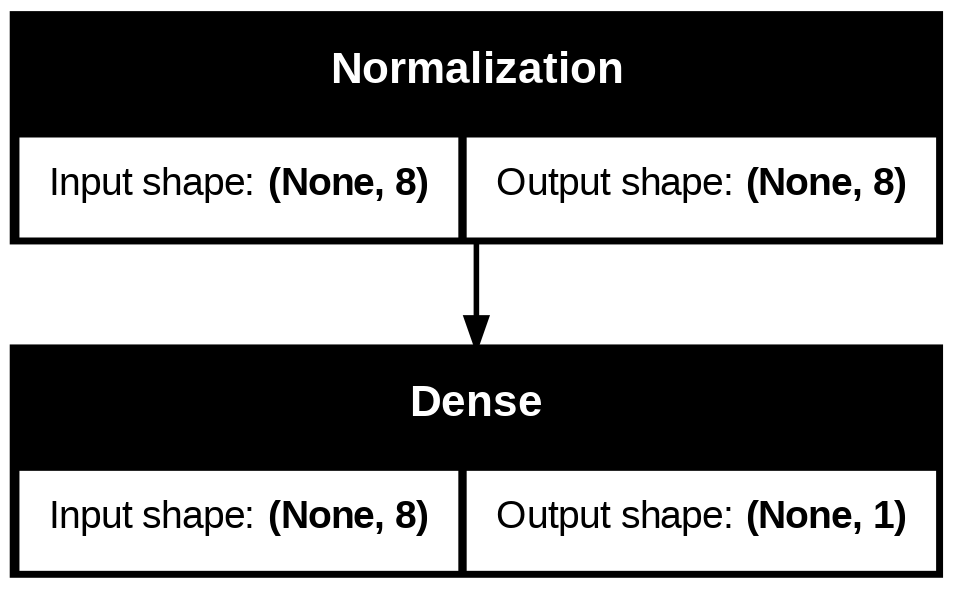

In [30]:
tf.keras.utils.plot_model(model, to_file = 'model.png', show_shapes = True)

In [31]:
model.compile(optimizer = Adam(learning_rate = 1.0), loss = MeanAbsoluteError(), metrics = [RootMeanSquaredError()])

In [32]:
history = model.fit(x_train,y_train,
                    validation_data = (x_val, y_val),
                    epochs = 100,
                    verbose = 1,
                    )

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 311412.7500 - root_mean_squared_error: 335567.3125 - val_loss: 273443.0000 - val_root_mean_squared_error: 299992.6250
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 314677.9062 - root_mean_squared_error: 338770.7500 - val_loss: 273417.6562 - val_root_mean_squared_error: 299969.5938
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 311376.9375 - root_mean_squared_error: 336064.3750 - val_loss: 273392.6250 - val_root_mean_squared_error: 299946.3125
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 316696.0625 - root_mean_squared_error: 339722.3438 - val_loss: 273367.6250 - val_root_mean_squared_error: 299922.6562
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 310671.0000 - root_mean_squared_error: 335008.7812 - val_loss: 273342.3125 - val_root_mean_squared_error: 299900.8438
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 312101.6562 - root_mean_squared_error: 336424.4375 - v

In [33]:
history.history

{'loss': [313270.625,
  313245.53125,
  313220.53125,
  313195.625,
  313170.46875,
  313145.59375,
  313120.625,
  313095.46875,
  313070.875,
  313045.5625,
  313020.59375,
  312995.53125,
  312970.5625,
  312945.625,
  312920.75,
  312895.46875,
  312870.5,
  312845.46875,
  312820.75,
  312795.5,
  312770.53125,
  312745.71875,
  312720.5,
  312695.5625,
  312670.625,
  312645.625,
  312620.59375,
  312595.46875,
  312570.59375,
  312545.4375,
  312520.4375,
  312495.59375,
  312470.59375,
  312445.78125,
  312420.65625,
  312395.59375,
  312370.46875,
  312345.71875,
  312320.5625,
  312295.53125,
  312270.4375,
  312245.59375,
  312220.625,
  312195.59375,
  312170.46875,
  312145.46875,
  312120.6875,
  312095.53125,
  312070.5,
  312045.46875,
  312020.59375,
  311995.4375,
  311970.625,
  311945.4375,
  311920.59375,
  311895.53125,
  311870.375,
  311845.46875,
  311820.4375,
  311795.5,
  311770.5625,
  311745.6875,
  311720.625,
  311695.5,
  311670.53125,
  311645.6875,
  

In [34]:
model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 302762.8125 - root_mean_squared_error: 325095.3438 


[302978.0625, 326002.96875]

In [35]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.build(input_shape=(None, 8))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,706 (10.57 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 17 (72.00 B)

**Reasoning**:
Analyze the model's performance by examining the evaluation metrics and the scatter plot to understand the prediction errors.



In [37]:
model.compile(optimizer = Adam(learning_rate = 0.1), loss = MeanAbsoluteError(), metrics = [RootMeanSquaredError()])

In [38]:
print("Test Loss (MAE):", model.evaluate(x_test, y_test)[0])
print("Test Root Mean Squared Error (RMSE):", model.evaluate(x_test, y_test)[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 305262.1250 - root_mean_squared_error: 327424.7500  
Test Loss (MAE): 305477.5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 305262.1250 - root_mean_squared_error: 327424.7500 
Test Root Mean Squared Error (RMSE): 328327.875


In [39]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1),
])
model.build(input_shape=(None, 8))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

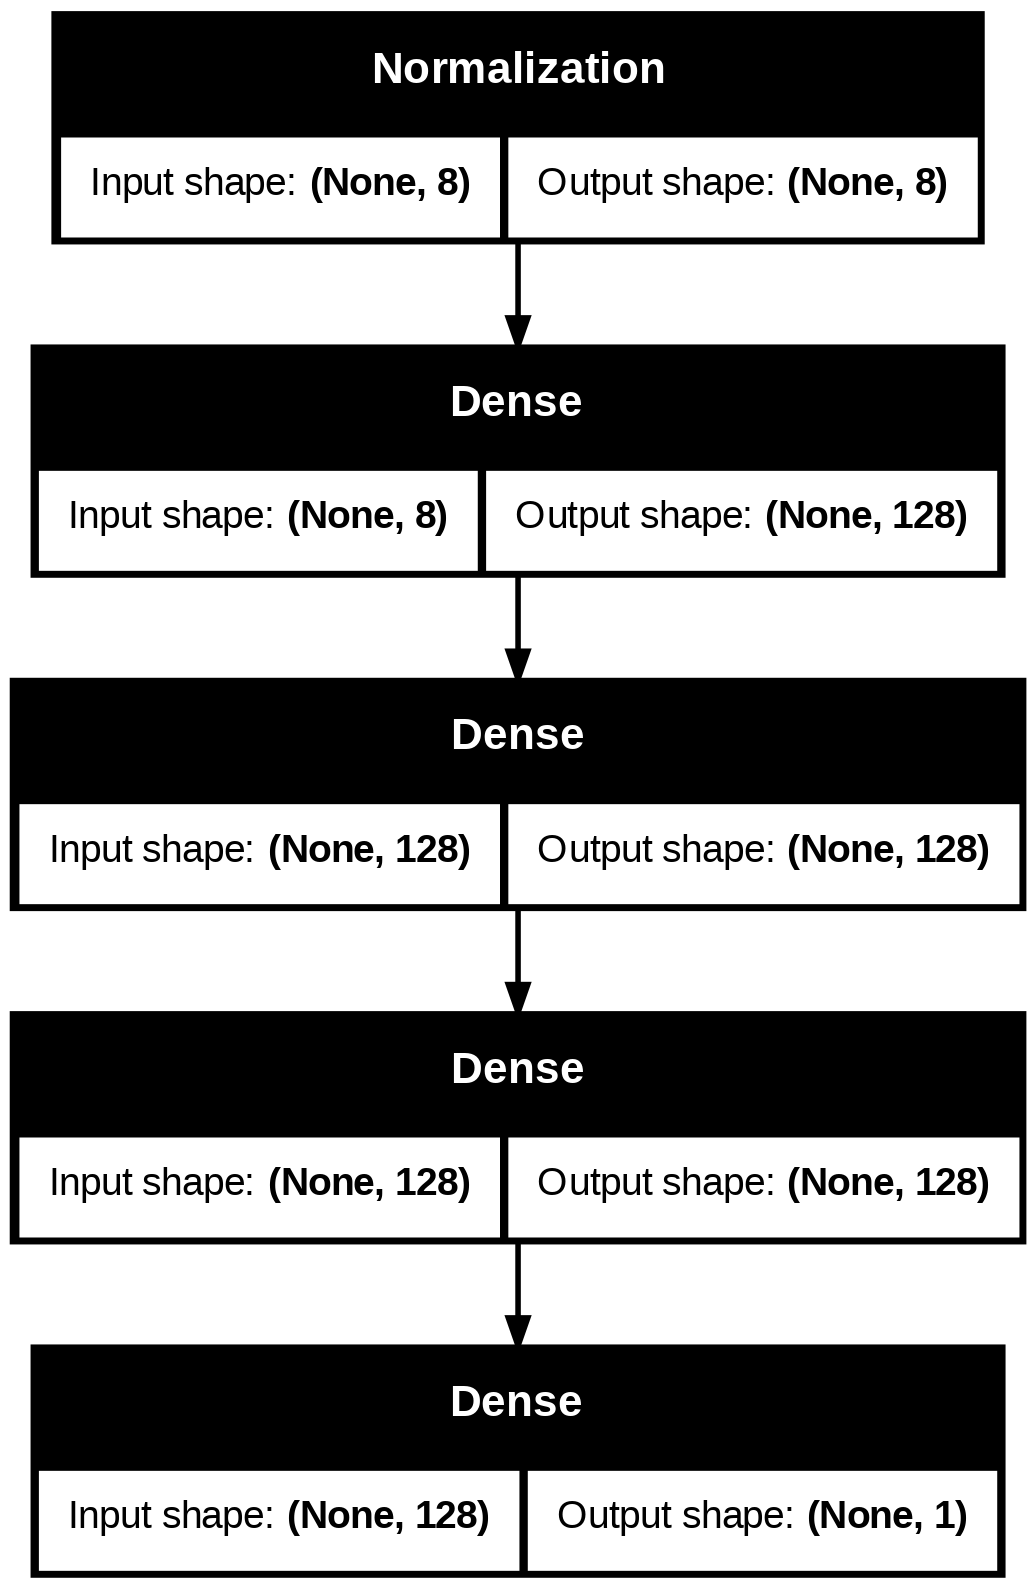

In [40]:
tf.keras.utils.plot_model(model, to_file = 'model.png', show_shapes = True)

In [43]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = MeanAbsoluteError(), metrics = [RootMeanSquaredError()]) # Add compile step
histoy = model.fit(x_train,y_train,
                    validation_data = (x_val, y_val),
                    epochs = 100,
                    verbose = 1,
                    )

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 316090.8125 - root_mean_squared_error: 340942.2500 - val_loss: 273457.7500 - val_root_mean_squared_error: 300006.4375
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 314751.0938 - root_mean_squared_error: 340533.5000 - val_loss: 273383.1875 - val_root_mean_squared_error: 299939.3438
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 313398.0312 - root_mean_squared_error: 338532.0312 - val_loss: 273047.6250 - val_root_mean_squared_error: 299638.3125
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 311815.2188 - root_mean_squared_error: 335432.1250 - val_loss: 272001.0938 - val_root_mean_squared_error: 298698.8125
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 308095.9062 - root_mean_squared_error: 335098.0938 - val_loss: 269440.2500 - val_root_mean_squared_error: 296406.2188
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 302496.6875 - root_mean_squared_error: 329338.6562 - va

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34771.1484 - root_mean_squared_error: 43984.0469 - val_loss: 38750.3594 - val_root_mean_squared_error: 48112.9570
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34763.9453 - root_mean_squared_error: 43241.2188 - val_loss: 38554.0039 - val_root_mean_squared_error: 47991.6992
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 33714.7305 - root_mean_squared_error: 42350.0273 - val_loss: 38523.5859 - val_root_mean_squared_error: 47956.8359
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 34292.6914 - root_mean_squared_error: 43123.8516 - val_loss: 38546.0898 - val_root_mean_squared_error: 48001.9609
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 34675.1328 - root_mean_squared_error: 43318.9023 - val_loss: 38524.0234 - val_root_mean_squared_error: 47987.2188
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 33885.0742 - root_mean_squared_error: 42944.0977 - val_loss: 38513.2109 -

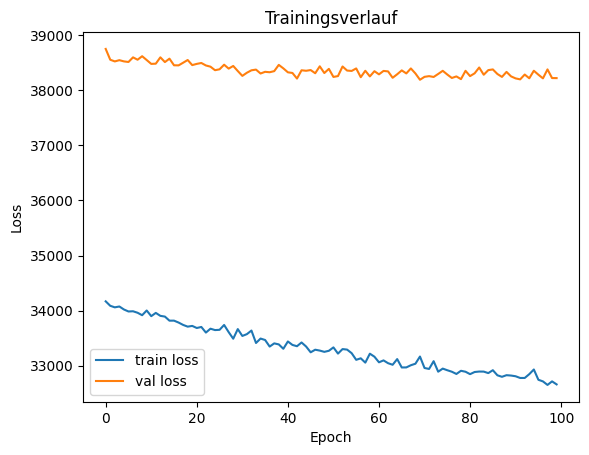

In [44]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

plt.plot(history.history['loss'], label='train loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Trainingsverlauf')
plt.legend()
plt.show()


In [ ]:
# Fazit:
# Das Modell konnte den Trainingsfehler reduzieren (train_loss sinkt),
# jedoch bleibt der Validierungsfehler relativ hoch und stagniert.
# → Das weist auf Overfitting hin oder darauf, dass die aktuellen Features
#   nicht ausreichen, um den Zielwert (current_price) genau vorherzusagen.
#
# Nächste Schritte:
# - Weitere relevante Features einbeziehen oder Feature Engineering betreiben
# - Regularisierung einsetzen (Dropout, L2)
# - Hyperparameter anpassen (z. B. Lernrate, Layer-Anzahl)
# - Mehr Daten sammeln oder Datenqualität prüfen
